In [1]:
import numpy as np
import sympy as sy
sy.init_printing()

q, p, gamma, sigma, h, kBT = sy.symbols("q, p, gamma, sigma, h, k_{B}T")
U = q**4
rho_conf = sy.exp(-U)
rho_vel = sy.exp(-p**2)
rho = rho_conf * rho_vel
sigma = sy.sqrt(2 * gamma * kBT)

def commutator(X, Y):
    """Return the commutator [X,Y] = XY - YX"""
    return lambda rho : X(Y(rho)) - Y(X(rho))

def commutator_3(X, Y, Z):
    """[X, Y, Z] = [X, [Y, Z]]"""
    return lambda rho : commutator(X, commutator(Y, Z))(rho)

def BCH_series(A, B):
    """First couple terms of BCH expansion"""
    return lambda rho : A(rho) + B(rho) + 0.5 * commutator(A, B)(rho) + (1.0/12) * (commutator(A, commutator(A, B))(rho) - commutator(B, commutator(A, B))(rho))

def first_term_BCH_series(A, B, C):
    """"""
    return lambda rho : A(rho) + B(rho) + C(rho) + (h/2) * (commutator(A,B)(rho) + commutator(A, C)(rho) + commutator(B, C)(rho))

def BCH_series_symmetric_scheme(X, Y, Z):
    """Symmetric schemes of the form XYZYX.
    X + Y + Z - h^2 (1/12 ([Z, Z, Y] + [Y+Z, Y+Z, X]) - 1/24 ([Y, Y, Z] + X, X, Y+Z)))
    
    """
    Y_Z = lambda rho : Y(rho) + Z(rho)
    L_0 = lambda rho : X(rho) + Y(rho) + Z(rho) 
    L_2_a = lambda rho : (1.0 / 12) * (commutator_3(Z, Z, Y)(rho) + 
                                     commutator_3(Y_Z, Y_Z, X)(rho))
    L_2_b = lambda rho : (- 1.0 / 24) * (commutator_3(Y, Y, Z)(rho) + commutator_3(X, X, Y_Z)(rho))
    L_2 = lambda rho : L_2_a(rho) + L_2_b(rho)
    return lambda rho : L_0(rho) + h**2 * L_2(rho)

# the next three definitions are from page 288 of Leimkuhler and Matthews, valid in 1D
def R_operator(rho):
    """Kolmogorov operator of R step"""
    return - p * sy.diff(rho, q)

A = R_operator

def V_operator(rho):
    """Kolmogorov operator of V step"""
    return sy.diff(U, q) * sy.diff(rho, p)

B = V_operator

def O_operator(rho):
    """Kolmogorov operator of O step"""
    return gamma * (rho + p * sy.diff(rho, p)) + (sigma**2 / 2) * sy.diff(rho, p, 2)

O = O_operator

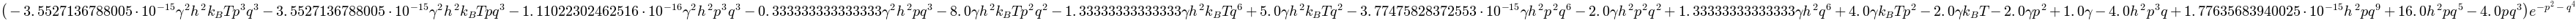

In [2]:
sy.simplify(BCH_series_symmetric_scheme(B, A, O)(rho))

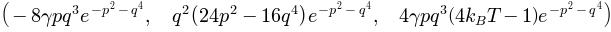

In [3]:
sy.simplify(commutator(B, O)(rho)), sy.simplify(commutator(A, B)(rho)), sy.simplify(commutator(A, O)(rho))

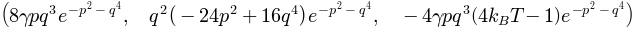

In [4]:
sy.simplify(commutator(O, B)(rho)), sy.simplify(commutator(B, A)(rho)), sy.simplify(commutator(O, A)(rho))

In [5]:
bch_expr = sy.simplify(first_term_BCH_series(A, B, O)(rho))

In [6]:
bch_fxn = sy.lambdify((gamma, h, p, q, kBT), bch_expr)

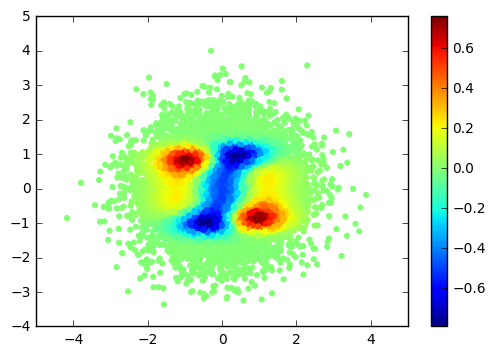

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


ps,qs,cs = [], [], []
for i in range(10000):
    p,q = np.random.randn(2)
    c = bch_fxn(0.5, 0.1, p, q, 1.0)
    ps.append(p)
    qs.append(q)
    cs.append(c)
plt.scatter(ps, qs, c=cs, linewidths=0)
plt.colorbar()